In [1]:
import pandas as pd # all required library import here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
dataset=pd.read_excel('Hira_Final_Excel_30_Features.xlsx')# our data set read 

In [3]:
dataset.head()

,Unnamed: 0,SwHBa,minHBd,MDEN-13,XLogP,MATS2s,GATS2s,GGI6,SpMax1_Bhs,GATS4m,...,minHssNH,SRW9,GATS3e,ASP-1,R_TpiPCTPC,GATS5c,AATS8m,GATS1c,GATS3s,CLASS
0,0,-0.351249,-0.602163,-0.38591,-0.080868,-0.458866,-0.276488,-0.083801,0.281555,0.689056,...,-0.175906,-1.504694,-0.519184,0.277805,-0.347614,-0.600570,-0.072174,-0.368918,-0.386182,0
1,1,0.267557,-0.664901,-0.38591,-0.278347,-0.145311,-0.158102,-0.239339,-0.329995,0.743703,...,-0.217294,-1.504694,0.056759,0.726497,-0.348569,-0.141784,-0.167602,0.100444,0.161942,0
2,2,0.797947,-0.156930,-0.38591,0.800734,-0.107372,-0.469982,-0.780609,-0.364963,0.430726,...,0.117806,-1.504694,-0.270485,0.557216,-0.272658,1.581178,-0.353213,0.347286,0.110075,0
3,3,0.002126,-0.965972,-0.38591,-0.420579,-0.639170,0.622512,0.296402,0.292371,0.435166,...,-0.415906,0.826836,-0.558183,-0.110332,-0.595717,-0.127133,-0.337717,-0.505372,-0.342719,0
4,4,0.112239,-0.830326,-0.38591,-0.756176,-0.142033,0.295054,-0.320218,0.023826,0.679495,...,-0.326422,-1.504694,-0.653413,0.726497,-0.682845,0.226682,-0.563980,-0.463201,-0.715704,0


In [4]:
print( len(dataset) )
print(dataset.head())

2548
   Unnamed: 0     SwHBa    minHBd  MDEN-13     XLogP    MATS2s    GATS2s  \
0           0 -0.351249 -0.602163 -0.38591 -0.080868 -0.458866 -0.276488   
1           1  0.267557 -0.664901 -0.38591 -0.278347 -0.145311 -0.158102   
2           2  0.797947 -0.156930 -0.38591  0.800734 -0.107372 -0.469982   
3           3  0.002126 -0.965972 -0.38591 -0.420579 -0.639170  0.622512   
4           4  0.112239 -0.830326 -0.38591 -0.756176 -0.142033  0.295054   

       GGI6  SpMax1_Bhs    GATS4m  ...  minHssNH      SRW9    GATS3e  \
0 -0.083801    0.281555  0.689056  ... -0.175906 -1.504694 -0.519184   
1 -0.239339   -0.329995  0.743703  ... -0.217294 -1.504694  0.056759   
2 -0.780609   -0.364963  0.430726  ...  0.117806 -1.504694 -0.270485   
3  0.296402    0.292371  0.435166  ... -0.415906  0.826836 -0.558183   
4 -0.320218    0.023826  0.679495  ... -0.326422 -1.504694 -0.653413   

      ASP-1  R_TpiPCTPC    GATS5c    AATS8m    GATS1c    GATS3s  CLASS  
0  0.277805   -0.347614 -0.60057

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 32 columns):
Unnamed: 0     2548 non-null int64
SwHBa          2548 non-null float64
minHBd         2548 non-null float64
MDEN-13        2548 non-null float64
XLogP          2548 non-null float64
MATS2s         2548 non-null float64
GATS2s         2548 non-null float64
GGI6           2548 non-null float64
SpMax1_Bhs     2548 non-null float64
GATS4m         2548 non-null float64
SpMax3_Bhm     2548 non-null float64
BCUTc-1h       2548 non-null float64
GATS2v         2548 non-null float64
nHBAcc2        2548 non-null float64
SM1_Dzi        2548 non-null float64
AATS7i         2548 non-null float64
minHBa         2548 non-null float64
CrippenLogP    2548 non-null float64
hmax           2548 non-null float64
maxaaN         2548 non-null float64
AATS3i         2548 non-null float64
MLFER_L        2548 non-null float64
minHssNH       2548 non-null float64
SRW9           2548 non-null float64
GATS3e 

In [9]:
x=dataset.iloc[:,0:31]
y=dataset.iloc[:,31]
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)# trian and test data spliting 

In [10]:
len(x_train)

2038

In [11]:
len(x_test)

510

In [7]:
sc_x=StandardScaler()# standerdized all values
x_test=sc_x.fit_transform(x_test)
x_train=sc_x.fit_transform(x_train)

In [8]:
classifier=KNeighborsClassifier(n_neighbors=5, p=2,metric="euclidean")#here putt k value =5, beacuse on this value accuracy and f1 score show maximum. by check graph 

In [9]:
# P is the class number so here just two classes exist 0,1. 

In [10]:
#  metric="euclidean"??

In [11]:
k_values=[i for i in range(1,50,2)] # code for check the value of K
k_acc_scores=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    cv_scores = cross_val_score(knn,x_train,y_train, cv=5,scoring="accuracy")
    k_acc_scores.append(cv_scores.mean())
    
k_optimal=k_values[k_acc_scores.index(max(k_acc_scores))]
print(k_optimal)
                    

5


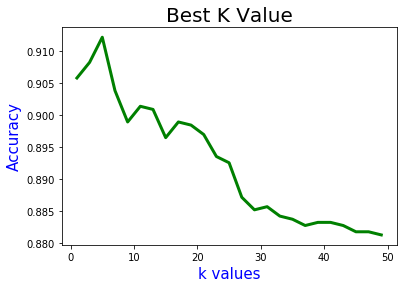

In [20]:
plt.plot(k_values,k_acc_scores,color="green",Linewidth=3)# graphical representation of k value
plt.xlabel("k values",color='blue',fontsize=15)
plt.ylabel("Accuracy",color='blue',fontsize=15)
plt.title("Best K Value",color="black",fontsize=20)
plt.show()
#labels = (k_values)
#width = 0.35 
#fig, ax = plt.subplots()
#ax.bar(labels,k_values, width, label='K_value')
#ax.bar(labels, k_acc_scores, width,label='acc')
#ax.set_ylabel('Acc')
#ax.set_xlabel('k_value')
#ax.set_title('BEST Value OF K')
#ax.legend()

#plt.show()

#k_value = (k_values)
#values = (k_acc_scores)

#fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
#axs[0].bar(k_values, values)
#axs[1].scatter(k_values, values)
#axs[2].plot(k_values, values)
#fig.suptitle('Categorical Plotting')

In [13]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
import math
math.sqrt(len(y_test))

22.58317958127243

In [15]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [16]:
cm=confusion_matrix(y_test,y_pred)# confusion matrix..
print(cm)

[[431  15]
 [ 29  35]]


In [17]:
print(f1_score(y_test,y_pred))

0.6140350877192983


In [18]:
print(accuracy_score(y_test,y_pred))

0.9137254901960784


In [19]:
dataset.isnull().sum()

Unnamed: 0     0
SwHBa          0
minHBd         0
MDEN-13        0
XLogP          0
MATS2s         0
GATS2s         0
GGI6           0
SpMax1_Bhs     0
GATS4m         0
SpMax3_Bhm     0
BCUTc-1h       0
GATS2v         0
nHBAcc2        0
SM1_Dzi        0
AATS7i         0
minHBa         0
CrippenLogP    0
hmax           0
maxaaN         0
AATS3i         0
MLFER_L        0
minHssNH       0
SRW9           0
GATS3e         0
ASP-1          0
R_TpiPCTPC     0
GATS5c         0
AATS8m         0
GATS1c         0
GATS3s         0
CLASS          0
dtype: int64